In [286]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt

# Create a new DXF document (AutoCAD 2000)
doc = ezdxf.new('R2000')

# Create a new modelspace
msp = doc.modelspace()

### Parameters

In [287]:
# Set document units to micrometers
doc.header['$INSUNITS'] = 13  # 13 is the code for micrometers in DXF
doc.header['$MEASUREMENT'] = 1  # 1 for metric measurement system
doc.header['$LUNITS'] = 4  # 4 for decimal units
doc.header['$LUPREC'] = 6  # 6 decimal places for units

length = 5
width = [0.2]
gap = [0.2]
number_of_rectangles = 15
turning = 0.5
bondpad_width = 2
bondpad_length = 5
field_size = 300
#width = [0.08, 0.1, 0.12, 0.15, 0.2, 0.4, 0.6, 1.0, 2.0, 4.0]
#gap = [0.05,0.1,0.2,0.5]

### Pattern

In [288]:
xint1 = 0
yint1 = 0
for g in gap:
    for w in width:
        x_position = xint1
        y_position = yint1
        for i in range(number_of_rectangles):
            # Create a rectangle for each width
            # Points for rectangle: bottom-left -> bottom-right -> top-right -> top-left
            points = [
                (x_position, y_position),
                (x_position+length, y_position),
                (x_position+length, y_position + w),
                (x_position, y_position + w),
                (x_position, y_position + w + 3*g)
            ]
            # Draw rectangle as a closed polyline
            msp.add_lwpolyline(points, close=True)
            # Update y position for next rectangle with some spacing
            y_position += w + 3*g
        points = [
            (x_position, y_position),
            (x_position, field_size/2),
            (x_position - turning, field_size/2),
            (xint1 - turning, -field_size/2),
            (xint1, -field_size/2),
            (xint1, yint1)
        ]
        # Draw rectangle as a closed polyline
        msp.add_lwpolyline(points, close=True)

        x_position += length + turning
        y_position -= g
        xint2 = x_position
        yint2 = y_position
        for i in range(number_of_rectangles):
            # Create a rectangle for each width
            # Points for rectangle: bottom-left -> bottom-right -> top-right -> top-left
            points = [
                (x_position, y_position),
                (x_position-length, y_position),
                (x_position-length, y_position-w),
                (x_position, y_position-w),
                (x_position, y_position - w - 3*g)
            ]
            # Draw rectangle as a closed polyline
            msp.add_lwpolyline(points, close=True)
            # Update y position for next rectangle with some spacing
            y_position -= (w+3*g)
        points = [
            (x_position, y_position),
            (x_position, -field_size/2),
            (x_position + turning, -field_size/2),
            (xint2 + turning, field_size/2),
            (xint2, field_size/2),
            (xint2, yint2)
        ]
        msp.add_lwpolyline(points, close=True)

    

# Save the DXF file
doc.saveas('lt_wb.dxf')

In [289]:
# Bondpads
for g in gap:
    points = [
        (xint1, yint1),
        (xint1 - bondpad_width, yint1 - bondpad_length),
        (xint1 - bondpad_width, yint1 - 2*bondpad_length),
        (xint1 + bondpad_width + length, yint1 - 2*bondpad_length),
        (xint1 + bondpad_width + length, yint1 - bondpad_length),
        (xint1 + length + turning, yint1 - g),
        (xint1 + length + turning + turning, yint1 - g),
        (xint1 + length + turning + turning + bondpad_width, yint1 - bondpad_length),
        (xint1 + length + turning + turning + bondpad_width, yint1 - 2*bondpad_length - bondpad_width),
        (xint1 - bondpad_width - turning - turning, yint1 - 2*bondpad_length - bondpad_width),
        (xint1 - bondpad_width - turning - turning, yint1 - bondpad_length),
        (xint1 - turning, yint1),
    ]
    msp.add_lwpolyline(points, close=True)
    points = [
        (xint2, yint2),
        (xint2 + bondpad_width, yint2 + bondpad_length),
        (xint2 + bondpad_width, yint2 + 2*bondpad_length),
        (xint2 - bondpad_width - length, yint2 + 2*bondpad_length),
        (xint2 - bondpad_width - length, yint2 + bondpad_length),
        (xint2 - length - turning, yint2 + g),
        (xint2 - length - turning - turning, yint2 + g),
        (xint2 - length - turning - turning - bondpad_width, yint2 + bondpad_length),
        (xint2 - length - turning - turning - bondpad_width, yint2 + 2*bondpad_length + bondpad_width),
        (xint2 + bondpad_width + turning + turning, yint2 + 2*bondpad_length + bondpad_width),
        (xint2 + bondpad_width + turning + turning, yint2 + bondpad_length),
        (xint2 + turning, yint2),
    ]
    msp.add_lwpolyline(points, close=True)

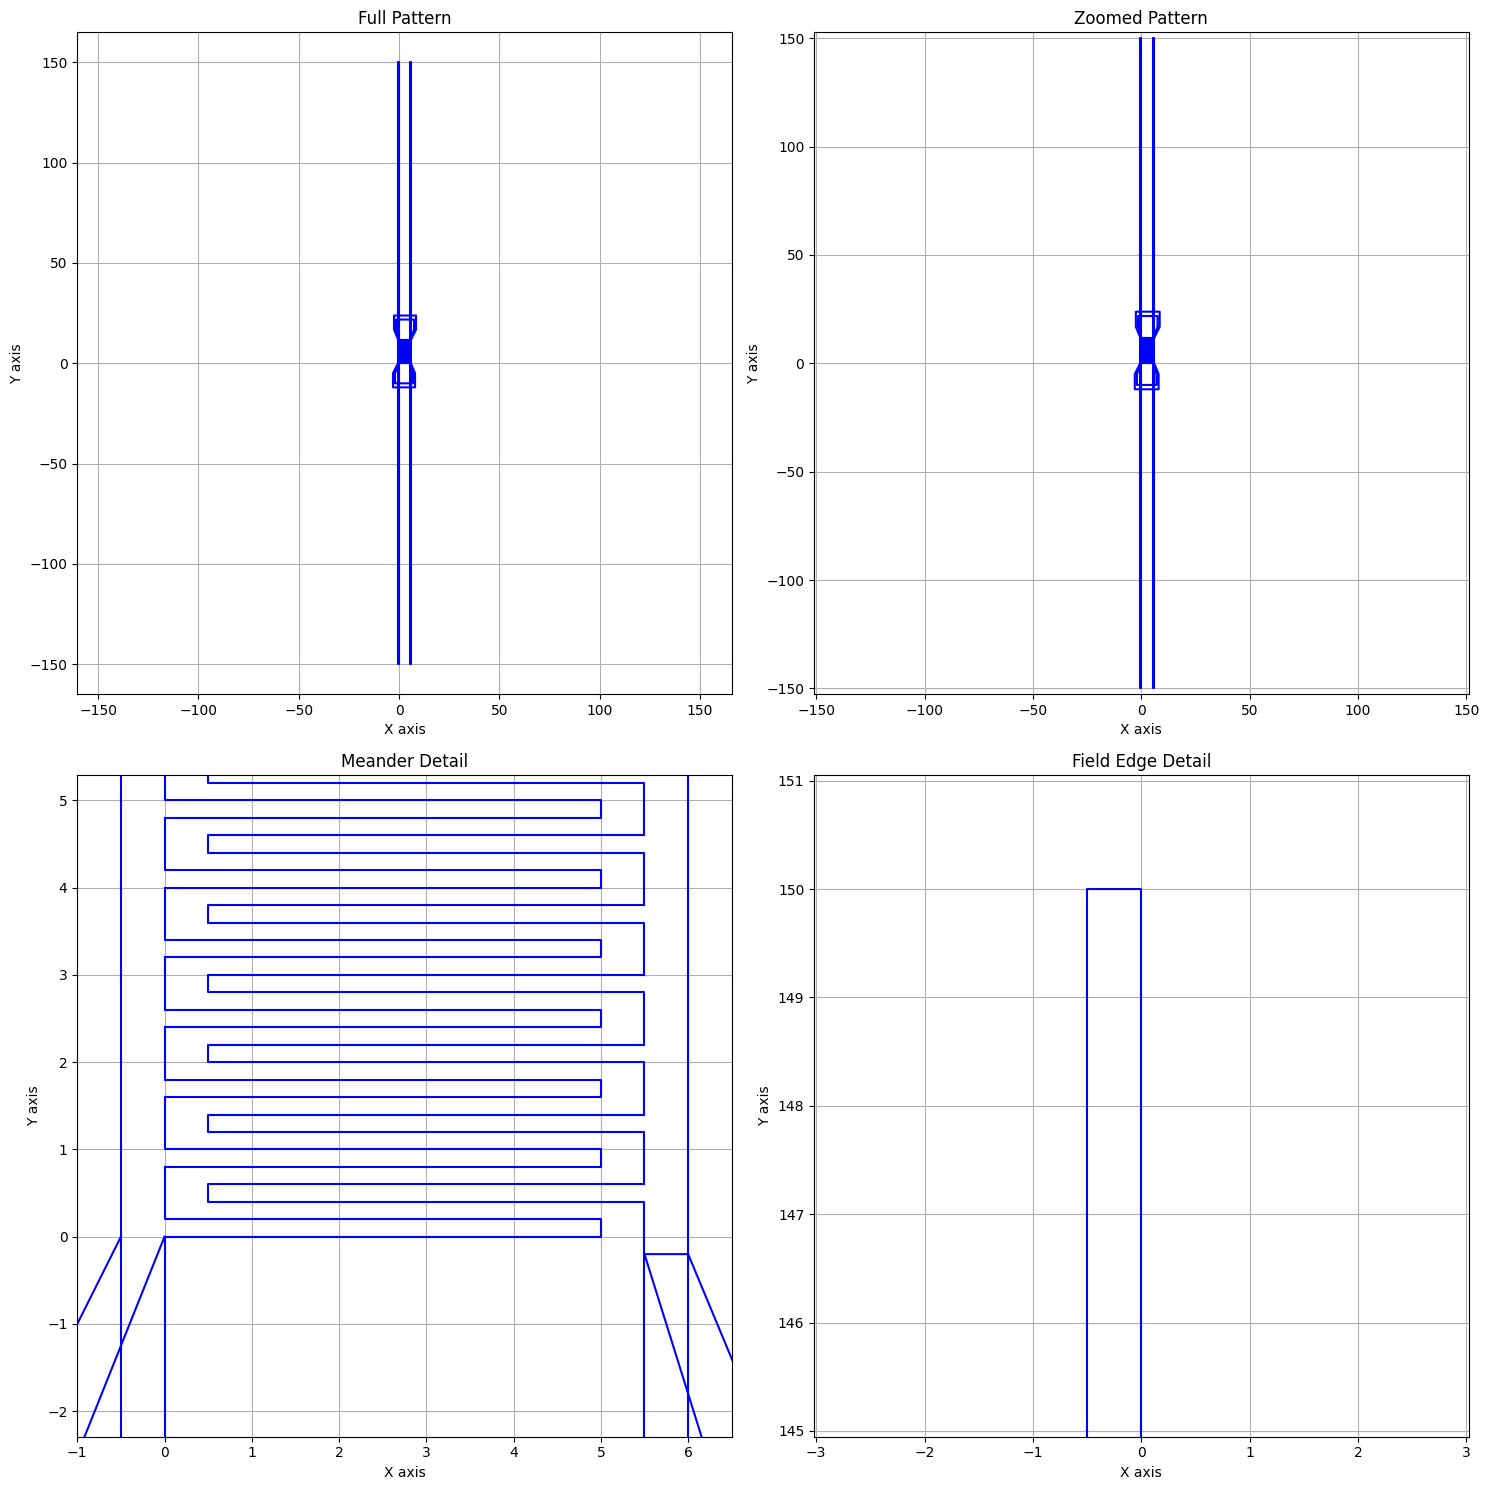

In [290]:
# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# Plot the full pattern in the first subplot (unchanged)
for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points()
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        ax1.plot(x_coords, y_coords, 'b-')

ax1.grid(True)
ax1.set_title('Full Pattern')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.axis('equal')

# Plot zoomed section in the second subplot (unchanged)
for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points()
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        ax2.plot(x_coords, y_coords, 'b-')

ax2.grid(True)
ax2.set_title('Zoomed Pattern')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.axis('equal')
ax2.set_xlim([-field_size/2, field_size/2])
ax2.set_ylim([-field_size/2, field_size/2])

# Plot meander detail in the third subplot (unchanged)
for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points()
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        ax3.plot(x_coords, y_coords, 'b-')

ax3.grid(True)
ax3.set_title('Meander Detail')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.axis('equal')
ax3.set_xlim([-1, length + turning + 1])
ax3.set_ylim([-1, 4])

# Add fourth subplot showing the field edge
for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points()
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        ax4.plot(x_coords, y_coords, 'b-')

ax4.grid(True)
ax4.set_title('Field Edge Detail')
ax4.set_xlabel('X axis')
ax4.set_ylabel('Y axis')
ax4.axis('equal')
# Set zoom limits to show field edge
ax4.set_xlim([-2, 2])
ax4.set_ylim([field_size/2 - 5, field_size/2 + 1])

plt.tight_layout()
plt.show()
